# Nearest Neighbour Interpolation 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Using OpenCV

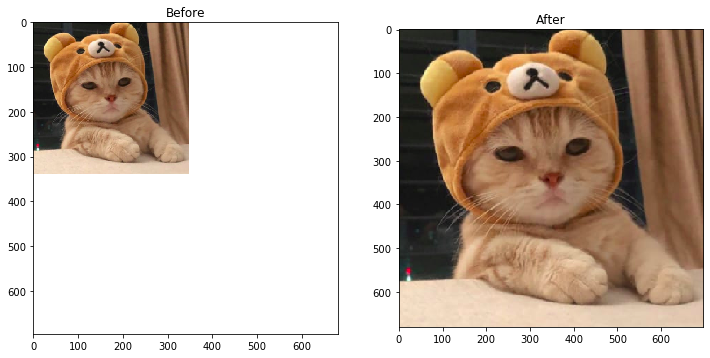

In [2]:
img = cv2.imread('images/cat.png')

h,w = img.shape[:2]

resized = cv2.resize(img, (2*w, 2*h), 0, 0, interpolation = cv2.INTER_NEAREST)

# plotting the results.
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xlim(0, 2*h)
plt.ylim(2*w, 0)
plt.title('Before')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('After')

plt.show()

## Manually from scratch

In [3]:
def NNI(A, new_h, new_w):
    h, w = A.shape
    new_img = np.zeros((new_h, new_w), dtype=np.uint8)

    row_ratio, col_ratio = h/new_h, w/new_w

    # normalize the rows and the cols.
    row_pos = np.ceil(np.arange(new_w)*row_ratio).astype(np.int)
    col_pos = np.ceil(np.arange(new_h)*col_ratio).astype(np.int)

    # bounding the values between (0, original_size).
    row_pos[row_pos >= w] = w-1
    col_pos[col_pos >= h] = h-1
    
    # row interpolation
    new_img = A[:, row_pos]

    # column interpolation
    new_img = new_img[col_pos, :]
    
    return new_img

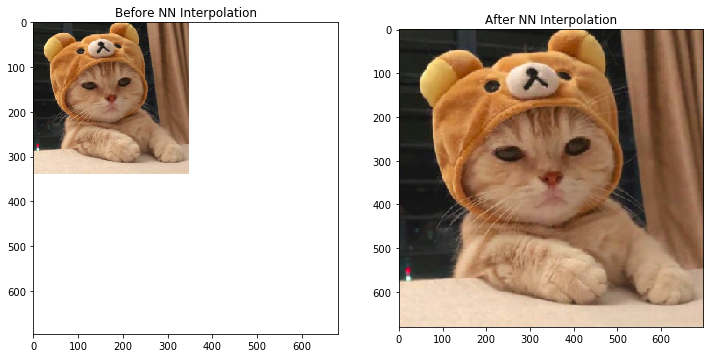

In [4]:
new_h, new_w = 2*h, 2*w
new_img = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# interpolation
new_img[:, :, 0] = np.copy(NNI(img[:, :, 0], new_h, new_w)) # Blue Channel
new_img[:, :, 1] = np.copy(NNI(img[:, :, 1], new_h, new_w)) # Green Channel
new_img[:, :, 2] = np.copy(NNI(img[:, :, 2], new_h, new_w)) # Red Channel

# plotting the results
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xlim(0, 2*h)
plt.ylim(2*w, 0)
plt.title('Before NN Interpolation')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.title('After NN Interpolation')

plt.show()